In [6]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from ultralytics import YOLO

Part A

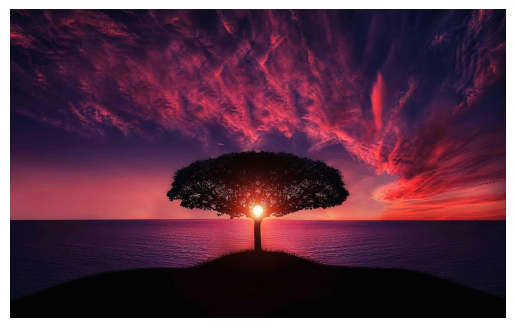

In [7]:
img = cv2.imread('/Users/anantasati/Desktop/tree-736885_1280.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors in Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

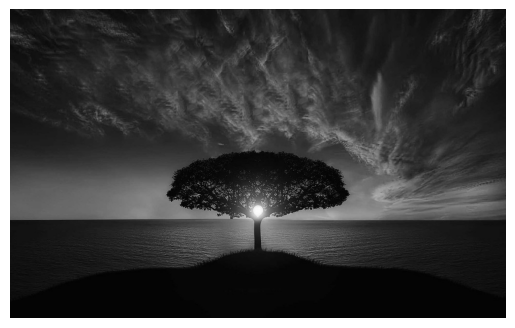

In [8]:
img_grey = cv2.imread('/Users/anantasati/Desktop/tree-736885_1280.jpg',cv2.IMREAD_GRAYSCALE) 
img_grey = cv2.cvtColor(img_grey, cv2.COLOR_BGR2RGB)
plt.imshow(img_grey)
plt.axis('off')  # Hide axes
plt.show()

Gaussian Blurring:Gaussian blur is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. It is also used as a preprocessing stage before applying our machine learning or deep learning models


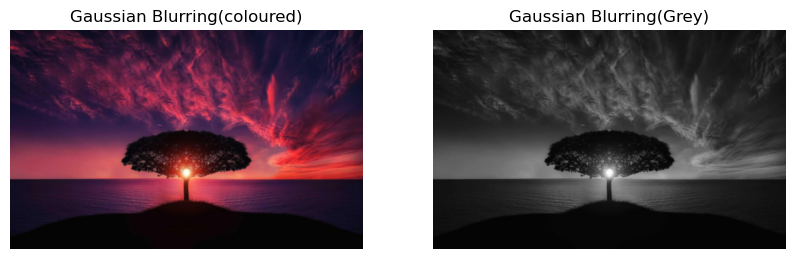

In [9]:
Gaussian = cv2.GaussianBlur(img, (7, 7), 0) 
Gaussian_grey = cv2.GaussianBlur(img_grey, (7, 7), 0) 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(Gaussian)  
axes[1].imshow(Gaussian_grey)  
axes[0].set_title('Gaussian Blurring(coloured)')
axes[1].set_title('Gaussian Blurring(Grey)')
axes[0].axis('off') 
axes[1].axis('off')
plt.show()

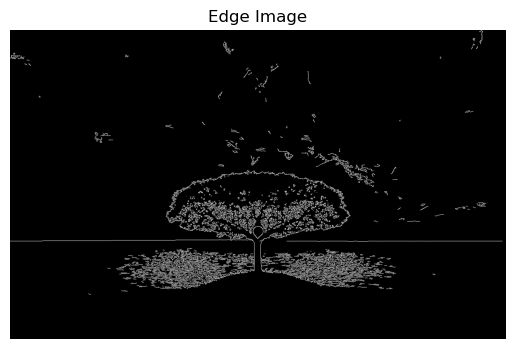

In [10]:
edges = cv2.Canny(img_grey,100,200)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.axis('off')
 
plt.show()


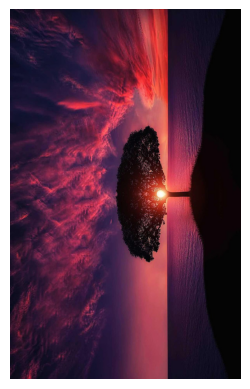

In [11]:
img_rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(img_rotated )
plt.axis('off')
plt.show()

Part B

In [12]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
X_train = X_train/255 
X_test = X_test/255
print(Y_test)

[7 2 1 ... 4 5 6]


In [13]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of Y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of Y_test:  (10000,)


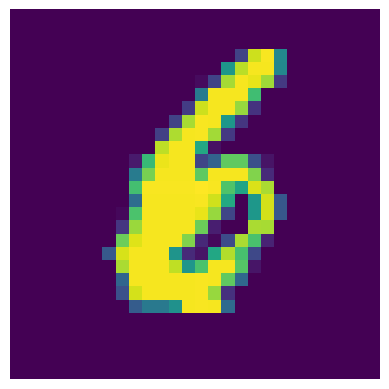

In [14]:
i = 129
plt.imshow(X_train[i])
plt.axis('off')
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = 'relu',input_shape=(28,28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(32, (3,3), activation = 'sigmoid'),
    keras.layers.MaxPooling2D((2,2)),  
    keras.layers.Conv2D(32, (3,3), activation = 'sigmoid'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation = 'softmax')
])

/opt/anaconda3/envs/cv_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
model.fit(X_train, Y_train, epochs = 5, batch_size =32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6527 - loss: 1.2638
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9532 - loss: 0.1845
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9706 - loss: 0.1091
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9773 - loss: 0.0812
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9802 - loss: 0.0686


In [18]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0839


[0.0707104280591011, 0.9786999821662903]

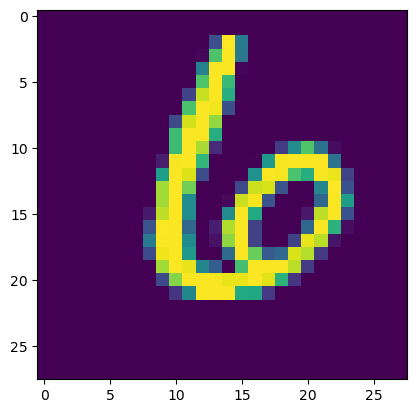

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
6


In [19]:
i = random.randint(0, len(Y_test))
plt.imshow(X_test[i])
plt.show()

y_pred = model.predict(X_test[i].reshape(1, 28,28,1))
predicted_class = np.argmax(y_pred)  
print(predicted_class)

PART C


image 1/1 /Users/anantasati/Desktop/IMG-20241118-WA0216.jpg: 640x480 2 persons, 2 cups, 1 donut, 1 dining table, 1 vase, 30.3ms
Speed: 4.7ms preprocess, 30.3ms inference, 14.1ms postprocess per image at shape (1, 3, 640, 480)


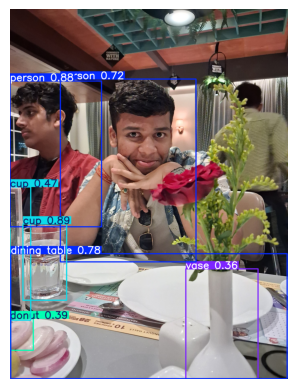

In [20]:
model = YOLO("yolov8n.pt")
# Perform object detection
results = model.predict("/Users/anantasati/Desktop/IMG-20241118-WA0216.jpg", device="mps")  # Use "cpu" if MPS isn't working

# Show results
for r in results:
    im_array = r.plot()  # Draw boxes on image
    plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()



image 1/1 /Users/anantasati/Desktop/PHOTO-2025-03-27-00-28-02.jpg: 640x544 7 persons, 2 cups, 1 sandwich, 1 pizza, 1 dining table, 31.9ms
Speed: 1.8ms preprocess, 31.9ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 544)


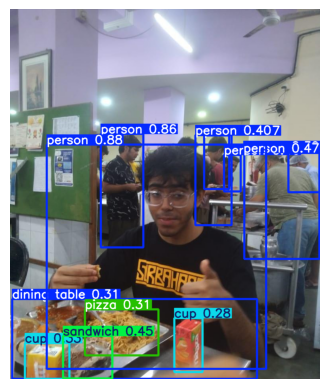

In [21]:
results = model.predict("/Users/anantasati/Desktop/PHOTO-2025-03-27-00-28-02.jpg", device="mps")  # Use "cpu" if MPS isn't working

# Show results
for r in results:
    im_array = r.plot()  # Draw boxes on image
    plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()



image 1/1 /Users/anantasati/Desktop/Clutter-hero.jpg: 352x640 1 person, 1 frisbee, 1 bed, 1 tv, 1 laptop, 24.5ms
Speed: 1.4ms preprocess, 24.5ms inference, 5.2ms postprocess per image at shape (1, 3, 352, 640)


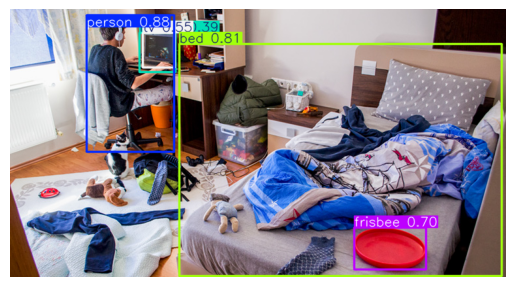

In [22]:

results = model.predict("/Users/anantasati/Desktop/Clutter-hero.jpg", device="mps")  # Use "cpu" if MPS isn't working

# Show results
for r in results:
    im_array = r.plot()  # Draw boxes on image
    plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


PART D

In [ ]:
img_grey = cv2.imread('/Users/anantasati/Desktop/tree-736885_1280.jpg',cv2.IMREAD_GRAYSCALE) 
img_grey = cv2.cvtColor(img_grey, cv2.COLOR_BGR2RGB)